## Illuma Task

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Read csv into notebook as a dataframe
data = pd.read_csv('M10208_UK_analytics_202110101143.csv')

In [3]:
pd.set_option('display.max_colwidth', None)
data

,day,line_item_id,split_id,campaign_id,placement_id,pixel_id,imps,clicks,total_conversions,post_view_convs,post_click_convs,media_cost,viewed_imps,view_measured_imps,line_item_name,split_name,pixel_name
0,2021-06-18,7250327,26931736,26901541,6933,0,8,0,0,0,0,0.016698,3,8,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_ DESKTOP LONDON,NaN
1,2021-06-18,7250327,26931736,26901541,2066826,0,2,0,0,0,0,0.002439,0,0,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_ DESKTOP LONDON,NaN
2,2021-06-18,7250327,26931736,26901541,4978139,0,1,0,0,0,0,0.001338,0,1,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_ DESKTOP LONDON,NaN
3,2021-06-18,7250327,26931736,26901541,6234721,0,6,0,0,0,0,0.006708,6,6,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_ DESKTOP LONDON,NaN
4,2021-06-18,7250327,26931736,26901541,6236678,0,1,0,0,0,0,0.001171,1,1,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_ DESKTOP LONDON,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544818,2021-10-09,15459641,0,50187724,22851957,0,4,0,0,0,0,0.004597,3,4,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_GUARANTEED VIEWABILITY,NaN,NaN
544819,2021-10-09,15459641,0,50187724,22851958,0,4,0,0,0,0,0.003019,2,4,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_GUARANTEED VIEWABILITY,NaN,NaN
544820,2021-10-09,15459641,0,50187724,22855821,0,6,0,0,0,0,0.007150,5,6,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_GUARANTEED VIEWABILITY,NaN,NaN
544821,2021-10-09,15459641,0,50187724,22880656,0,5,0,0,0,0,0.006198,5,5,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_GUARANTEED VIEWABILITY,NaN,NaN


In [4]:
# Check for missing values
data.isna().sum()

day                        0
line_item_id               0
split_id                   0
campaign_id                0
placement_id               0
pixel_id                   0
imps                       0
clicks                     0
total_conversions          0
post_view_convs            0
post_click_convs           0
media_cost                 0
viewed_imps                0
view_measured_imps         0
line_item_name             0
split_name            181754
pixel_name            540752
dtype: int64

In [5]:
# I can see split name and pixel name have a lot of missing values,
# however these will not be needed in the remainder of the task so can be dropped. 
data.drop(columns=['split_name','pixel_name'],inplace=True)

Aggregate the overall impressions, clicks, conversions, media cost, start date, end date of each strategy line.

In [6]:
# Check the different strategy lines
data['line_item_name'].value_counts()

UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO                       251760
UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_GUARANTEED VIEWABILITY     96706
UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO POWERWHITELIST         62513
UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_ GEO SOFT BLACKLIST        48796
UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_AUTO OPT                   44468
UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_ILLUMA CUSTOMER PEER       40580
Name: line_item_name, dtype: int64

In [7]:
# Aggregating the data by each strategy line
grouped = data.groupby(['line_item_name']).agg({'imps':'sum','clicks':'sum','total_conversions':'sum',
                                               'media_cost':'sum','day':['min','max']}).reset_index()
# Rename the columns
grouped.columns = ['line_item_name', 'imps', 'clicks', 'total_conversions', 'media_cost', 'start_date', 'end_date']


In [8]:
grouped

,line_item_name,imps,clicks,total_conversions,media_cost,start_date,end_date
0,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_AUTO OPT,9776209,3168,2346,26223.304851,2021-06-18,2021-10-09
1,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_GUARANTEED VIEWABILITY,5370562,1332,209,5113.722966,2021-08-02,2021-10-09
2,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_ILLUMA CUSTOMER PEER,1906451,458,370,8311.052414,2021-06-21,2021-10-09
3,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_ GEO SOFT BLACKLIST,1161330,315,274,3530.963225,2021-06-18,2021-10-09
4,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO,7684396,1042,985,7691.046694,2021-06-18,2021-10-09
5,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO POWERWHITELIST,2667726,723,684,10195.188253,2021-06-18,2021-10-09


Calculate the overall CPA of each line and find out illuma line's rank position.

In [9]:
grouped['CPA'] = grouped['media_cost']/grouped['total_conversions']

In [10]:
grouped.sort_values(['CPA'],ascending=True)

,line_item_name,imps,clicks,total_conversions,media_cost,start_date,end_date,CPA
4,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO,7684396,1042,985,7691.046694,2021-06-18,2021-10-09,7.808169
0,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_AUTO OPT,9776209,3168,2346,26223.304851,2021-06-18,2021-10-09,11.177879
3,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_ GEO SOFT BLACKLIST,1161330,315,274,3530.963225,2021-06-18,2021-10-09,12.886727
5,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO POWERWHITELIST,2667726,723,684,10195.188253,2021-06-18,2021-10-09,14.905246
2,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_ILLUMA CUSTOMER PEER,1906451,458,370,8311.052414,2021-06-21,2021-10-09,22.462304
1,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_GUARANTEED VIEWABILITY,5370562,1332,209,5113.722966,2021-08-02,2021-10-09,24.467574


In [11]:
# Illuma is ranked 5th in terms of CPA

Calculate the cumulative CPA change with respect to dates.

In [12]:
# Creating a new dataframe ordered by date containing just the Illuma line
illuma = data.loc[data['line_item_name'].str.contains("ILLUMA")].copy()  # Make a copy to avoid the warning
illuma.sort_values('day', ascending=True, inplace=True)  # Sort the DataFrame in-place 
# Remove redundant columns from the dataframe
illuma.drop(columns=['line_item_id','split_id','campaign_id','placement_id','pixel_id','line_item_name'],inplace=True)

illuma = illuma.groupby('day',as_index=False).agg({'imps':'sum','clicks':'sum','total_conversions':'sum', 
                                              'post_view_convs':'sum','post_click_convs':'sum',
                                              'media_cost':'sum','viewed_imps':'sum', 
                                              'view_measured_imps':'sum'},inplace=True)


# Calculate cumulative conversions and cumulative media costs 
illuma['cumulative_conversions'] = illuma['total_conversions'].cumsum()
illuma['cumulative_media_cost'] = illuma['media_cost'].cumsum()

# Calculate cumulative CPA 
illuma['cumulative_cpa'] = illuma['cumulative_media_cost'] / illuma['cumulative_conversions']

# Display the new DataFrame
illuma

,day,imps,clicks,total_conversions,post_view_convs,post_click_convs,media_cost,viewed_imps,view_measured_imps,cumulative_conversions,cumulative_media_cost,cumulative_cpa
0,2021-06-21,64684,27,0,0,0,141.553275,40880,59536,0,141.553275,inf
1,2021-06-22,44470,8,0,0,0,144.189662,26823,41456,0,285.742937,inf
2,2021-06-23,23761,3,0,0,0,142.907646,12254,22458,0,428.650583,inf
3,2021-06-24,23509,8,0,0,0,142.253263,12297,22141,0,570.903846,inf
4,2021-06-25,23786,4,2,2,0,140.548620,13229,22688,2,711.452466,355.726233
...,...,...,...,...,...,...,...,...,...,...,...,...
100,2021-10-05,16468,5,3,3,0,54.167757,9505,15994,358,8088.319296,22.593071
101,2021-10-06,15000,5,0,0,0,55.339638,9019,14518,358,8143.658934,22.747651
102,2021-10-07,14924,8,2,2,0,55.261088,8927,14445,360,8198.920022,22.774778
103,2021-10-08,14604,7,6,6,0,55.546837,8771,14114,366,8254.466859,22.553188


Plot the cumulative CPA change as data points (x-axis as dates, and y-axis as CPA).


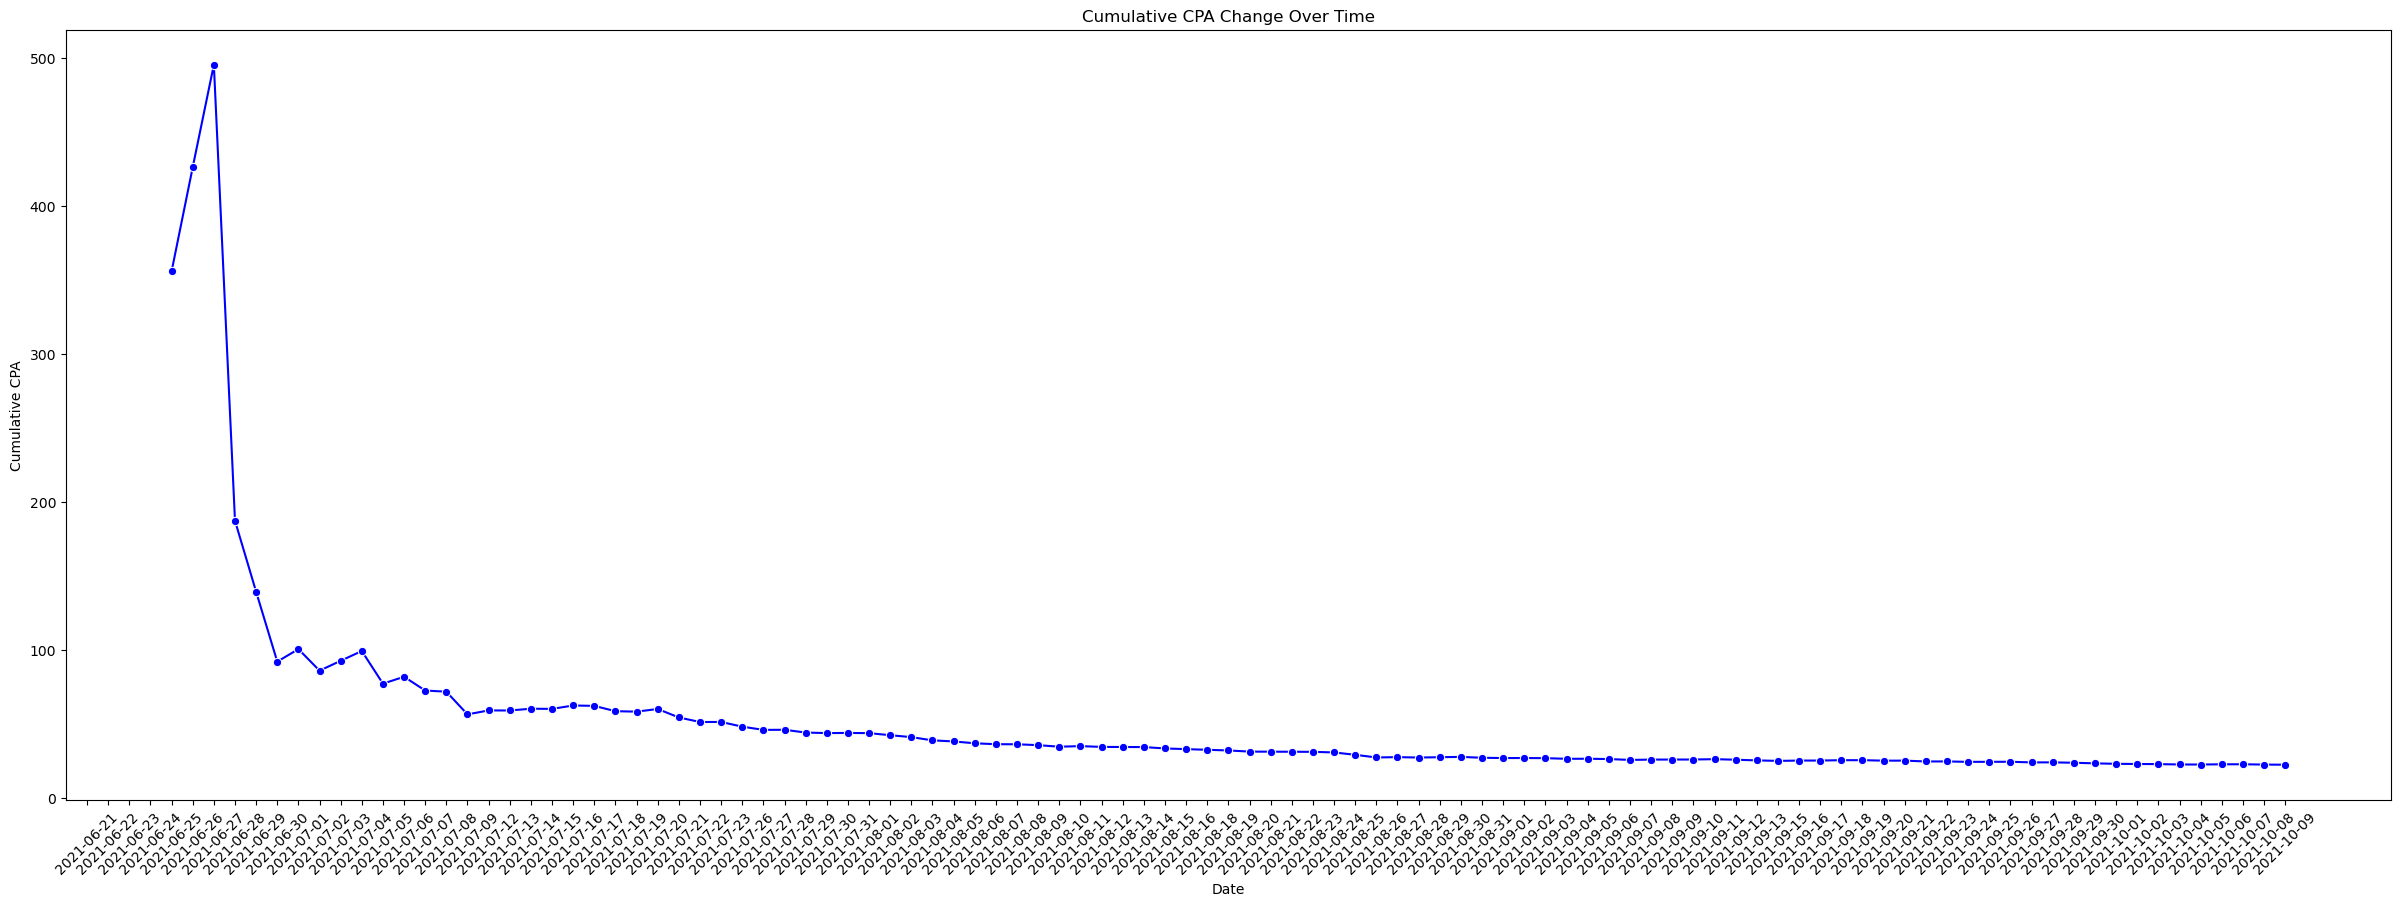

In [13]:
plt.figure(figsize=(30,10))

# Plot the cumulative CPA
sns.lineplot(data = illuma, x=illuma['day'], y=illuma['cumulative_cpa'],
             marker='o', linestyle='-', color='blue')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative CPA')
plt.title('Cumulative CPA Change Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Construct a mathematical function to model the change pattern.

In [14]:
# Convert dates to numerical representation
reference_date = pd.to_datetime('2021-06-21')  # Choosing a reference date
illuma['numerical_date'] = (pd.to_datetime(illuma['day']) - reference_date).dt.days

# Replace infinity values with NaN
illuma.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN values
illuma.dropna(subset=['cumulative_cpa'],inplace=True)

illuma.head()

,day,imps,clicks,total_conversions,post_view_convs,post_click_convs,media_cost,viewed_imps,view_measured_imps,cumulative_conversions,cumulative_media_cost,cumulative_cpa,numerical_date
4,2021-06-25,23786,4,2,2,0,140.548620,13229,22688,2,711.452466,355.726233,4
5,2021-06-26,21045,13,0,0,0,140.728339,9254,19657,2,852.180805,426.090402,5
6,2021-06-27,22066,6,0,0,0,138.506333,10320,20754,2,990.687138,495.343569,6
7,2021-06-28,28345,6,4,4,0,132.944236,15058,25968,6,1123.631374,187.271896,7
8,2021-06-29,30492,7,3,3,0,130.064875,17602,27885,9,1253.696249,139.299583,8


In [15]:
# Defining X and y variables
# For simplicity using date, conversions and cost as x variables
X = illuma[['numerical_date','cumulative_conversions','cumulative_media_cost']]
y = illuma['cumulative_cpa']

In [16]:
# Creating a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
predicted_cpa = model.predict(X)

# Add the predicted values to the DataFrame
illuma['predicted_cpa'] = predicted_cpa

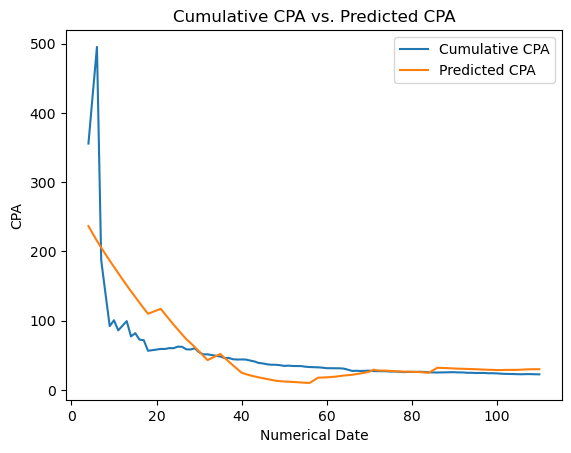

In [17]:
# Plot the actual and predicted CPAs
illuma.plot(x='numerical_date', y=['cumulative_cpa', 'predicted_cpa'])

plt.xlabel('Numerical Date')
plt.ylabel('CPA')
plt.title('Cumulative CPA vs. Predicted CPA')
plt.legend(['Cumulative CPA', 'Predicted CPA'])
plt.show()

In [18]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create the equation string
equation = "y = {:.2f}".format(intercept)

for i, coef in enumerate(coefficients):
    equation += " + {:.2f} * x{}".format(coef, i+1)

In [19]:
print("Equation for the predicted line:")
print(equation)

Equation for the predicted line:
y = 298.86 + 7.43 * x1 + -0.03 * x2 + -0.13 * x3


Predict illuma line's performance at the end of October 2021.

In [20]:
# Get the names of the x variables or features
x_variables = X.columns

# Print the x variables along with their corresponding coefficients
for i, variable in enumerate(x_variables):
    print(f"{variable}: {coefficients[i]}")

numerical_date: 7.432228058998967
cumulative_conversions: -0.0324881735841199
cumulative_media_cost: -0.12929053074255714


In [21]:
# The last day recorded was day 110 on 9th October therefore 22 days remaining of October
# I will make an assumption of cumulative media cost and conversions for the end of October in order to predict
# the CPA.
# I will use the median to avoid risk of any outliers in the data

In [22]:
print(illuma['media_cost'].median())
print(illuma['total_conversions'].median())

59.618123
3.0


In [23]:
# Calculate cost/ conversions for the last day of October
print(59*22 + 8311)
print(3*22 + 370)

9609
436


In [26]:
# Substituting values into the formula:
298.86 + 7.43 * 132 + -0.03 * 436 + -0.13 * 9609

17.36999999999989

In [25]:
# The predicted CPA of Illuma at the end of October is £17.37